### Hermite interpolating polynomials
We first construct the Hermite basis functions, expressed as
$$
H_{n,j}(x) = \left[1 - 2\,(x-x_{j})\,L'_{n,j}(x_{j})\right]\,L^{2}_{n,j}(x),
$$
and 
$$
\widehat{H}_{n,j}(x) = (x-x_{j})\,L^{2}_{n,j}(x)
$$

First we re-use the function to generate the Lagrange basis functions

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def f(x):
  return np.sin(x)
def f_prime(x):
  return np.cos(x)

In [55]:
def lagrange_sf(x,k,node_x):
  '''Evaluates the generic Lagrange shape function

  :param x: the locations where to evaluate the shape function
  :type x: double or np.array
  :param k: the function to be evaluated from 0 to len(node_x)-1. This is 1.0 at x_k and zero at the other points.
  :type k: int
  :param node_x: the x locations where the values of f are known. 
  :type node_x: list or np.array containing double x locations
  :raises Exception: Generic exception when k has an invalid range
  :return: the Lagrange shape functions evaluated at x.
  :rtype: double, list or np.array, depending on x and node_x.
  '''
  # Polynomial order
  n = len(node_x)-1
  if(k < 0)or(k > n):
    raise Exception("ERROR: invalid k")
  else:
    # Construct Lagrange shape functions    
    res = np.ones(len(x))
    for j in range(n+1):
      if(j != k):
        res *= (x-node_x[j])/(node_x[k]-node_x[j])
  return res

Additionally we need a way to generate the derivative $L'_{n,j}(x_{j})$ as discussed in class. 
Remember that 
$$
L'_{n,j}(x_{j}) = \sum_{k=0,k\ne j}^{n}\,\dfrac{1}{x_{j} - x_{k}}.
$$

In [107]:
def lagrange_prime(j,node_x):
  '''Eval the derivative of the j-th Lagrange polynomial at xj

  :param j: Basis id
  :type j: int
  :param node_x: x coordinate at the nodes
  :type node_x: list or np.array
  :raises Exception: exception for invalid basis id j
  :return: the value of the derivative
  :rtype: double
  '''
  n = len(node_x)-1
  if(j < 0)or(j > n):
      raise Exception("ERROR: Invalid shape function number j")
  res = 0.0
  for k in range(n+1):
    if(k != j):
      res += 1.0/(node_x[j]-node_x[k])
  # return 
  return res

The next function computed the shape function 
$$
H_{n,j}(x) = \left[1 - 2\,(x-x_{j})\,L'_{n,j}(x_{j})\right]\,L^{2}_{n,j}(x)
$$


In [79]:
def hermite_sf1(x,j,node_x):
  '''The Hermite shape functions of first type.
  The j-th function should be zero at all nodes except xj.
  In addition all first derivatives should be zero at the nodes.

  :param x: x coordinates where to evaluate the basis function
  :type x: list or np.array
  :param j: basis function id
  :type j: int
  :param node_x: x coordinates at the nodes
  :type node_x: list or np.array
  :return: the shape function at the locations x
  :rtype: list or np.array
  '''
  l_prime = lagrange_prime(j,node_x)
  l_sf = lagrange_sf(x,j,node_x)
  return (1.0 - 2.0*(x-node_x[j])*l_prime)*(l_sf**2)

Plot the shape function $H_{n,j}(x)$. 
This function should have all derivatives equal to zeros at the nodes and should be equal to zero at all the nodes except node $x_{j}$.

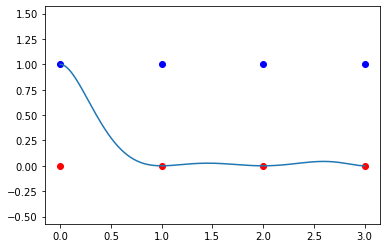

In [105]:
# Get values and derivatives from function f
node_x = np.array([0,1,2,3])
node_y = f(node_x)
node_y_prime = f_prime(node_x)

# Set the x values
x = np.linspace(0,3,500)
sf_id = 0
hermite_y = hermite_sf1(x,sf_id,node_x)

plt.axis('equal')
plt.plot(node_x,np.zeros(len(node_x)),'ro')
plt.plot(node_x,np.ones(len(node_x)),'bo')
plt.plot(x,hermite_y)
plt.show()

We also compute the second type of shape function
$$
\widehat{H}_{n,j}(x) = (x-x_{j})\,L^{2}_{n,j}(x)
$$

In [85]:
def hermite_sf2(x,j,node_x):
  '''The Hermite shape functions of second type.
  The j-th function should be zero at all nodes.
  In addition, all first derivatives should be zero at the nodes except 1 at xj.

  :param x: x locations for shape function evaluation
  :type x: list or np.array
  :param j: shape function id
  :type j: int
  :param node_x: x coordinates at the nodes
  :type node_x: list or np.arrray
  :return: the shape functions at the locations x
  :rtype: list or np.array
  '''
  l_sf = lagrange_sf(x,j,node_x)
  return (x-node_x[j])*(l_sf**2)

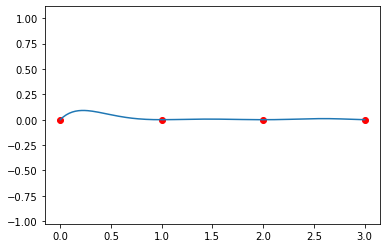

In [94]:
plt.axis('equal')
plt.plot(node_x,np.zeros(len(node_x)),'ro')
plt.plot(x,hermite_sf2(x,0,node_x))
plt.show()

Assemble the Hermite interpolatory polynomial from the two shape functions defined above

In [87]:
def hermite_int(x,node_x,node_y,node_y_prime):
  '''Generates the Hermite osculating polynomial

  :param x: locations where the Hermite polynomial need to be evaluated
  :type x: list or np.array
  :param node_x: x coordinates at the nodes
  :type node_x: list or np.array
  :param node_y: y values at the nodes
  :type node_y: list ot np.array
  :param node_y_prime: function derivatives at the nodes
  :type node_y_prime: list ot np.array
  :return: the Hermite osculating polynomial at the locations x
  :rtype: list or np.array
  '''
  n = len(node_x)-1
  res = np.zeros(len(x))
  for j in range(n+1):
    res += hermite_sf1(x,j,node_x)*node_y[j] + hermite_sf2(x,j,node_x)*node_y_prime[j]
  return res

Compare Hermite interpolating polynomial and original function

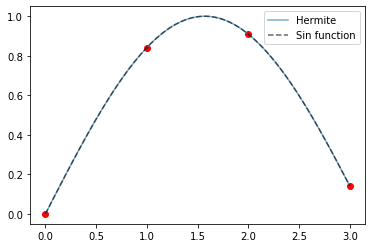

In [106]:
# Get values and derivatives from function f
node_x = np.array([0,1.0,2.0,3.0])
node_y = f(node_x)
node_y_prime = f_prime(node_x)

# Set the x values
x = np.linspace(0,3,100)
sf_id = 2

plt.plot(node_x,f(node_x),'ro')
plt.plot(x,hermite_int(x,node_x,node_y,node_y_prime),label='Hermite',alpha=0.6)
plt.plot(x,f(x),'k--',label='Sin function',alpha=0.6)
plt.legend()
plt.show()